In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Аня 1
# Дима 5
# Сергей 9  надо занулить f
# Миронов 3
# А я тоже 5

#Метод прогонки


In [ ]:
# Метод прогонки
def thomas(a, b, c, d):
    n = len(d)
    cp, dp = np.zeros(n - 1), np.zeros(n)
    cp[0] = c[0] / b[0]
    dp[0] = d[0] / b[0]
    for i in range(1, n - 1):
        m = 1.0 / (b[i] - a[i - 1] * cp[i - 1])
        cp[i] = c[i] * m
        dp[i] = (d[i] - a[i - 1] * dp[i - 1]) * m
    dp[-1] = (d[-1] - a[-1] * dp[-2]) / (b[-1] - a[-1] * cp[-1])
    for i in range(n - 2, -1, -1):
        dp[i] -= cp[i] * dp[i + 1]
    return dp

#Вариант 5
---
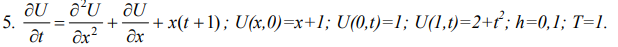

##Явная схема

In [ ]:
# Параметры задачи
L = 1.0  # Длина стержня
T = 1.0  # Общее время
alpha = 1.0  # Коэффициент перед второй производной

# Параметры сетки
Nx = np.array([11, 51, 101])  # Количество узлов по пространству
Nt = (Nx - 1) ** 2 * 2  # Количество шагов по времени (т.к 1/nx[i] = h, а tau = h**2/2*alpha)


# Функция расчета явной схемы
def explicit_scheme(Nx, Nt, silent=False):
    h = L / (Nx - 1)
    tau = T / Nt
    x = np.linspace(0, L, Nx)  # Узлы сетки по X
    t = np.linspace(0, T, Nt)
    print(
        f"<Явная> H: {h},\tTau: {tau}\nУсловие сходимости явной схемы {'выполняется' if h ** 2 / 2 >= tau else 'не выполняется!'}")
    U = np.zeros((Nt, Nx))  # Массив значений температуры во времени и пространстве (i - время, j - иксы)
    # Начальное условие в момент времени t = 0
    U[0, :] = x + 1
    # Краевые условия для t = 0
    U[0, 0] = 1
    U[0, -1] = 2
    # Проходим по всем слоям (моментам времени)
    for k in range(Nt - 1):
        # Записываем краевые условия в текущий момент времени
        gamma = (alpha * tau) / h ** 2
        for i in range(1, Nx - 1):
            # Через канонический вид
            U[k + 1, i] = gamma * U[k, i - 1] + (1 - 2 * gamma) * U[k, i] + gamma * U[k, i + 1] + tau * (
                        x[i] * (k * tau + 1))
        U[k + 1, 0] = 1
        U[k + 1, -1] = 2 + (k * tau + tau) ** 2
    if not silent:
        plt.figure(figsize=(10, 6))
        plt.imshow(U, aspect='auto', extent=[0, L, 0, T], origin='lower', cmap='hot')
        plt.colorbar(label='Температура U(x, t)')
        plt.ylabel('Время t')
        plt.xlabel('Координата x')
        plt.title('Распределение температуры U(x, t)')
        plt.minorticks_on()
        plt.grid(which='major')
        plt.grid(which='minor', linestyle=':')
        plt.show()

        X, T_mesh = np.meshgrid(t, x)
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, T_mesh, U.T, cmap='viridis')
        ax.set_xlabel('Координата x')
        ax.set_ylabel('Время t')
        ax.set_zlabel('Температура U(x, t)')
        ax.set_title('Решение уравнения теплопроводности')
        plt.show()
    return x, t, U

###Для 11 узлов

<Явная> H: 0.1,	Tau: 0.005
Условие сходимости явной схемы выполняется


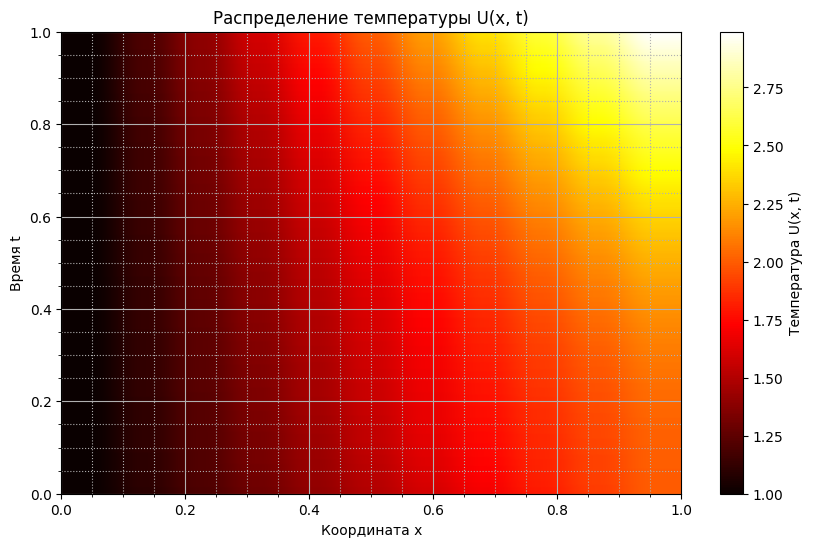

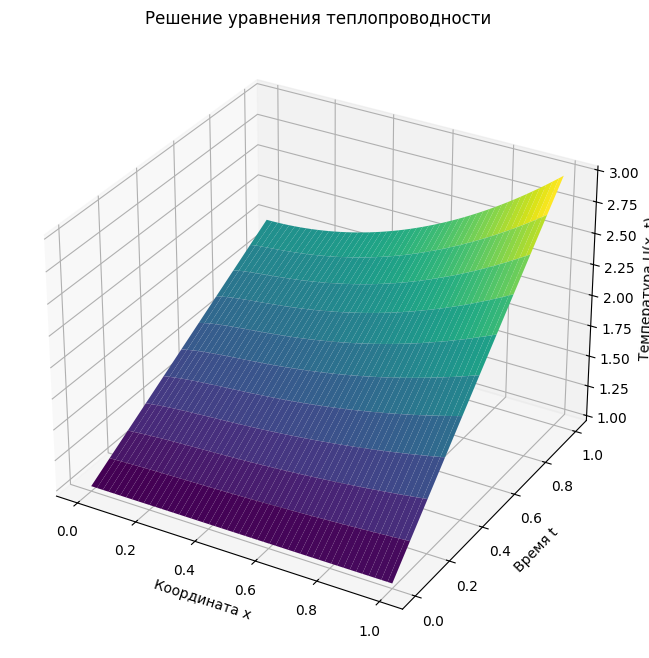

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

[0.         0.00502513 0.01005025 0.01507538 0.0201005  0.02512563
 0.03015075 0.03517588 0.04020101 0.04522613 0.05025126 0.05527638
 0.06030151 0.06532663 0.07035176 0.07537688 0.08040201 0.08542714
 0.09045226 0.09547739 0.10050251 0.10552764 0.11055276 0.11557789
 0.12060302 0.12562814 0.13065327 0.13567839 0.14070352 0.14572864
 0.15075377 0.15577889 0.16080402 0.16582915 0.17085427 0.1758794
 0.18090452 0.18592965 0.19095477 0.1959799  0.20100503 0.20603015
 0.21105528 0.2160804  0.22110553 0.22613065 0.23115578 0.2361809
 0.24120603 0.24623116 0.25125628 0.25628141 0.26130653 0.26633166
 0.27135678 0.27638191 0.28140704 0.28643216 0.29145729 0.29648241
 0.30150754 0.30653266 0.31155779 0.31658291 0.32160804 0.32663317
 0.33165829 0.33668342 0.34170854 0.34673367 0.35175879 0.35678392
 0.36180905 0.36683417 0.3718593  0.37688442 0.38190955 0.38693467
 0.3919598  0.39698492 0.40201005 0.40703518 0.4120603  0.41708543
 0.42211055 0.427

In [ ]:
print(*explicit_scheme(Nx[0], Nt[0]), sep='\n\n')

###Для 51 узла

<Явная> H: 0.02,	Tau: 0.0002
Условие сходимости явной схемы выполняется


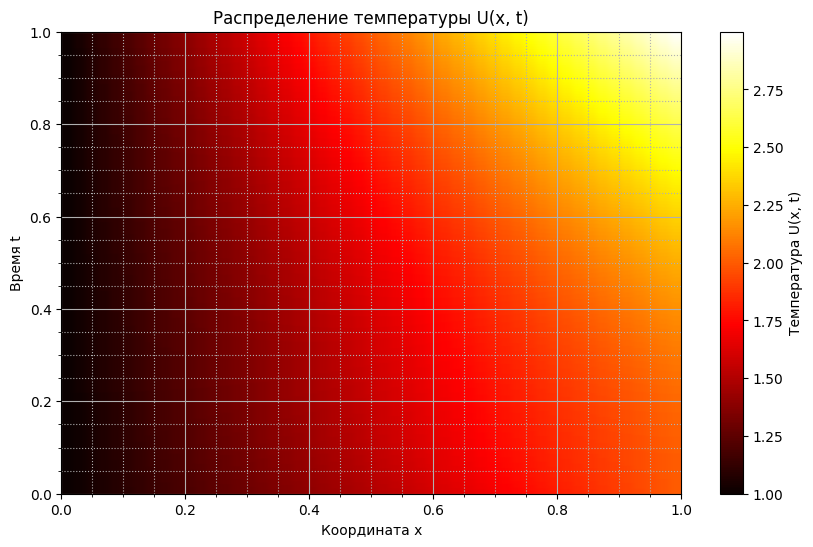

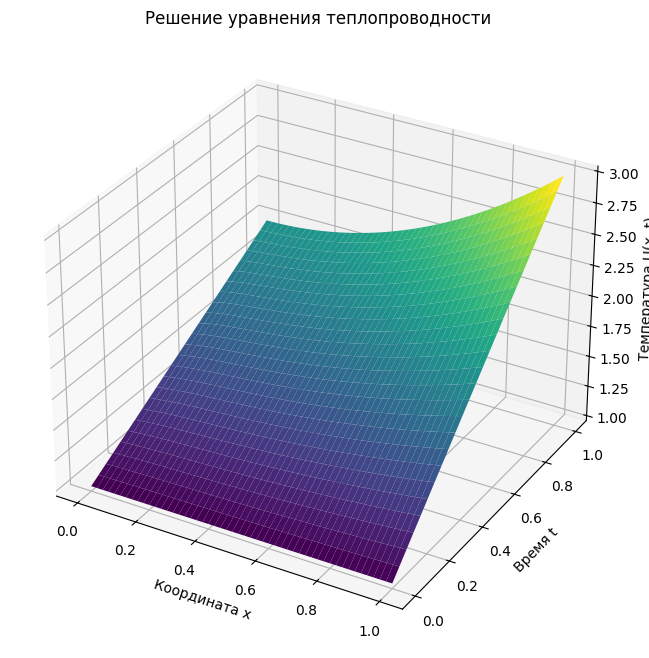

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]

[0.00000000e+00 2.00040008e-04 4.00080016e-04 ... 9.99599920e-01
 9.99799960e-01 1.00000000e+00]

[[1.         1.02       1.04       ... 1.96       1.98       2.        ]
 [1.         1.020004   1.040008   ... 1.960192   1.980196   2.00000004]
 [1.         1.020008   1.040016   ... 1.96038404 1.98029206 2.00000016]
 ...
 [1.         1.04036589 1.08073044 ... 2.91973876 2.95927093 2.99880036]
 [1.         1.04037322 1.0807451  ... 2.92012006 2.95966144 2.99920016]
 [1.         1.04038055 1.08075977 ... 2.92050144 2.96005203 2.99960004]]


In [ ]:
print(*explicit_scheme(Nx[1], Nt[1]), sep='\n\n')

###Для 101 узла

<Явная> H: 0.01,	Tau: 5e-05
Условие сходимости явной схемы выполняется


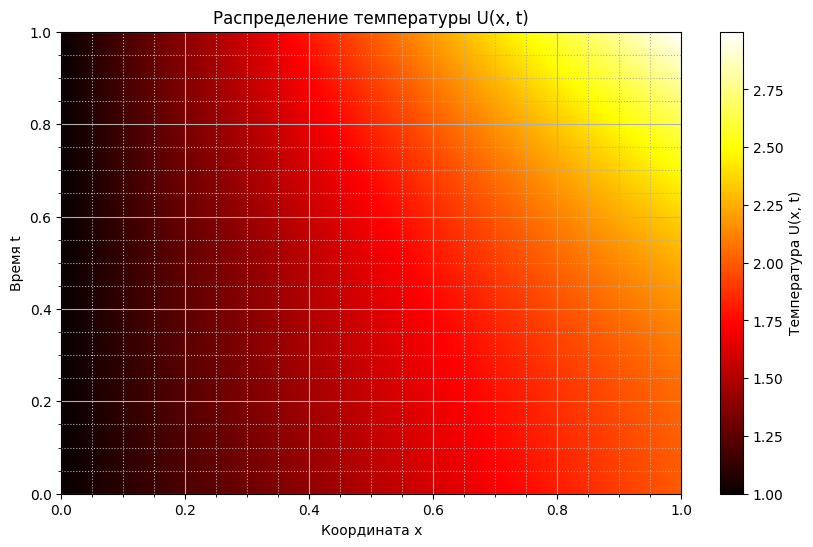

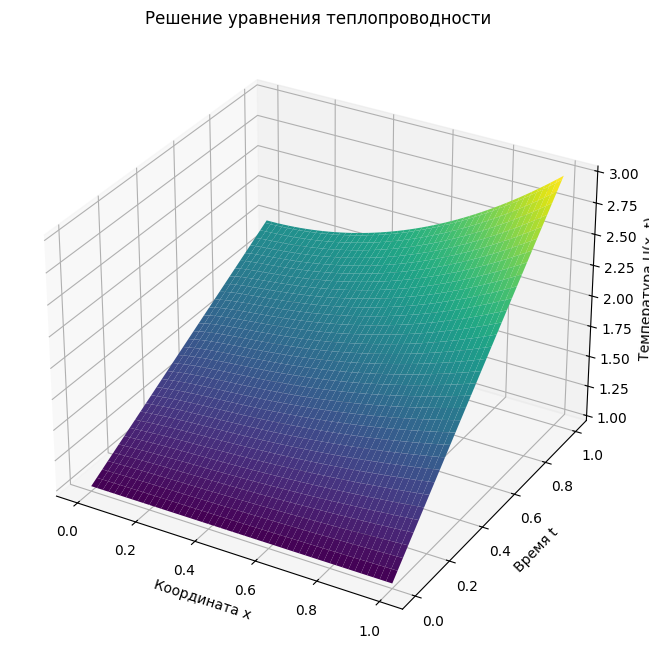

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]

[0.00000000e+00 5.00025001e-05 1.00005000e-04 ... 9.99899995e-01
 9.99949997e-01 1.00000000e+00]

[[1.         1.01       1.02       ... 1.98       1.99       2.        ]
 [1.         1.0100005  1.020001   ... 1.980049   1.9900495  2.        ]
 [1.         1.010001   1.020002   ... 1.980098   1.990074   2.00000001]
 ...
 [1.         1.02019148 1.0403828  ... 2.9601505  2.97992543 2.99970002]
 [1.         1.0201924  1.04038463 ... 2.96024816 2.98002425 2.99980001]
 [1.         1.02

In [ ]:
print(*explicit_scheme(Nx[2], Nt[2]), sep='\n\n')

##Неявная схема

In [ ]:
def implicit_scheme(Nx, Nt, silent=False):
    # 1. Инициализация сетки
    dx = L / (Nx - 1)  # Шаг по пространству
    dt = T / Nt  # Шаг по времени
    print(
        f"<Не явная> H: {dx},\tTau: {dt}\nУсловие сходимости явной схемы {'выполняется' if dx ** 2 / 2 >= dt else 'не выполняется!'}")
    x = np.linspace(0, L, Nx)  # Пространственные узлы
    t = np.linspace(0, T, Nt)  # Временные узлы
    U = np.zeros((Nt, Nx))  # Инициализация массива решения

    # 2. Начальное условие U(x,0) = x + 1
    U[0, :] = x + 1

    # 3. Коэффициенты трехдиагональной матрицы
    a_coeff = (-alpha * dt / dx ** 2) + (dt / (2 * dx))  # Коэффициент для U_{i-1}
    b_coeff = 1 + 2 * alpha * dt / dx ** 2  # Коэффициент для U_i
    c_coeff = (-alpha * dt / dx ** 2) - (dt / (2 * dx))  # Коэффициент для U_{i+1}

    # 4. Временной цикл
    for n in range(Nt - 1):
        current_time = n * dt
        next_time = (n + 1) * dt

        # 5.1 Граничные условия
        U[n + 1, 0] = 1  # Левый край: U(0,t) = 1
        U[n + 1, -1] = 2 + next_time ** 2  # Правый край: U(L,t) = 2 + t²

        # 5.2 Формирование правой части
        rhs = U[n, 1:-1].copy()  # Копируем предыдущее решение

        # Добавляем источник x(t+1)
        rhs += dt * x[1:-1] * (next_time + 1)

        # Учет граничных условий в правой части
        rhs[0] -= a_coeff * U[n + 1, 0]  # Влияние левой границы
        rhs[-1] -= c_coeff * U[n + 1, -1]  # Влияние правой границы

        # 5.3 Решение системы уравнений
        solution = thomas(
            a=np.full(Nx - 2, a_coeff),  # Нижняя диагональ (Nx-2 элемента)
            b=np.full(Nx - 2, b_coeff),  # Главная диагональ
            c=np.full(Nx - 2, c_coeff),  # Верхняя диагональ
            d=rhs
        )

        # 5.4 Обновление решения
        U[n + 1, 1:-1] = solution
    if not silent:
        plt.figure(figsize=(10, 6))
        plt.imshow(U, aspect='auto', extent=[0, L, 0, T], origin='lower', cmap='hot')
        #contours = plt.axes().contour(x,t,U, colors='white', linewidths=0.5, levels=10)

        plt.colorbar(label='Температура U(x, t)')
        plt.ylabel('Время t')
        plt.xlabel('Координата x')
        plt.title('Распределение температуры U(x, t)')
        plt.minorticks_on()
        plt.grid(which='major')
        plt.grid(which='minor', linestyle=':')
        plt.show()

        X, T_mesh = np.meshgrid(t, x)
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, T_mesh, U.T, cmap='viridis')
        ax.set_xlabel('Координата x')
        ax.set_ylabel('Время t')
        ax.set_zlabel('Температура U(x, t)')
        ax.set_title('Решение уравнения теплопроводности')
        plt.show()
    return x, t, U

###Для 11 узлов и условием на τ

<Не явная> H: 0.1,	Tau: 0.005
Условие сходимости явной схемы выполняется


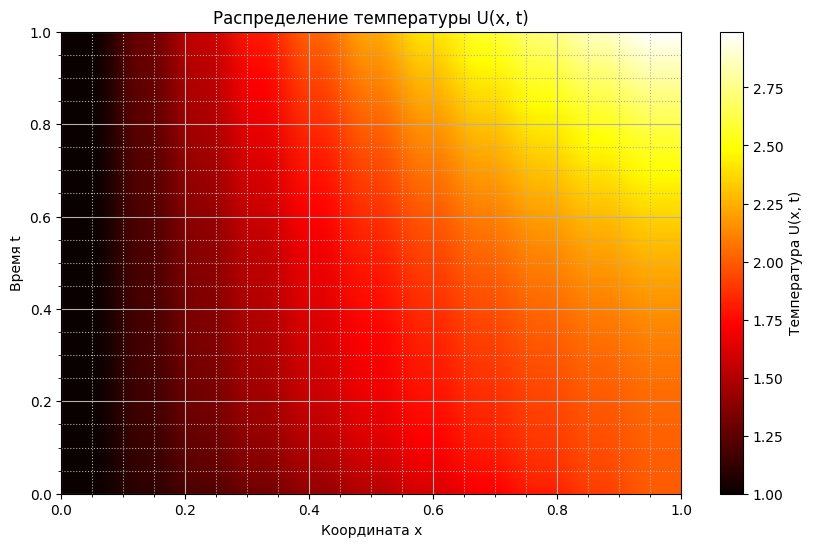

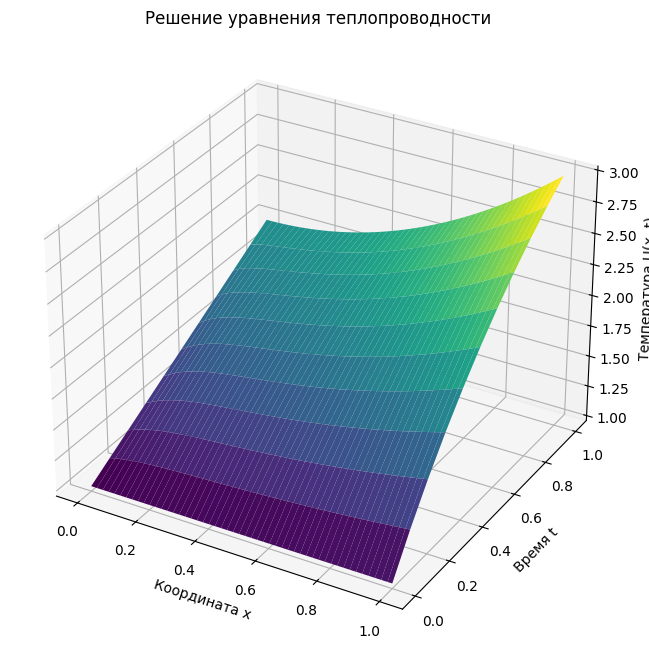

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

[0.         0.00502513 0.01005025 0.01507538 0.0201005  0.02512563
 0.03015075 0.03517588 0.04020101 0.04522613 0.05025126 0.05527638
 0.06030151 0.06532663 0.07035176 0.07537688 0.08040201 0.08542714
 0.09045226 0.09547739 0.10050251 0.10552764 0.11055276 0.11557789
 0.12060302 0.12562814 0.13065327 0.13567839 0.14070352 0.14572864
 0.15075377 0.15577889 0.16080402 0.16582915 0.17085427 0.1758794
 0.18090452 0.18592965 0.19095477 0.1959799  0.20100503 0.20603015
 0.21105528 0.2160804  0.22110553 0.22613065 0.23115578 0.2361809
 0.24120603 0.24623116 0.25125628 0.25628141 0.26130653 0.26633166
 0.27135678 0.27638191 0.28140704 0.28643216 0.29145729 0.29648241
 0.30150754 0.30653266 0.31155779 0.31658291 0.32160804 0.32663317
 0.33165829 0.33668342 0.34170854 0.34673367 0.35175879 0.35678392
 0.36180905 0.36683417 0.3718593  0.37688442 0.38190955 0.38693467
 0.3919598  0.39698492 0.40201005 0.40703518 0.4120603  0.41708543
 0.42211055 0.427

In [ ]:
print(*implicit_scheme(Nx[0], Nt[0]), sep='\n\n')

###Для 51 узлов и условием на τ

<Не явная> H: 0.02,	Tau: 0.0002
Условие сходимости явной схемы выполняется


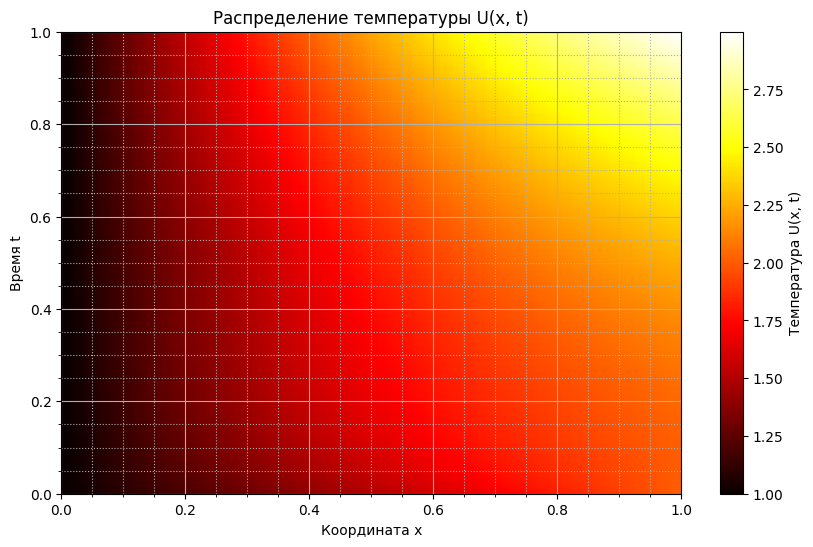

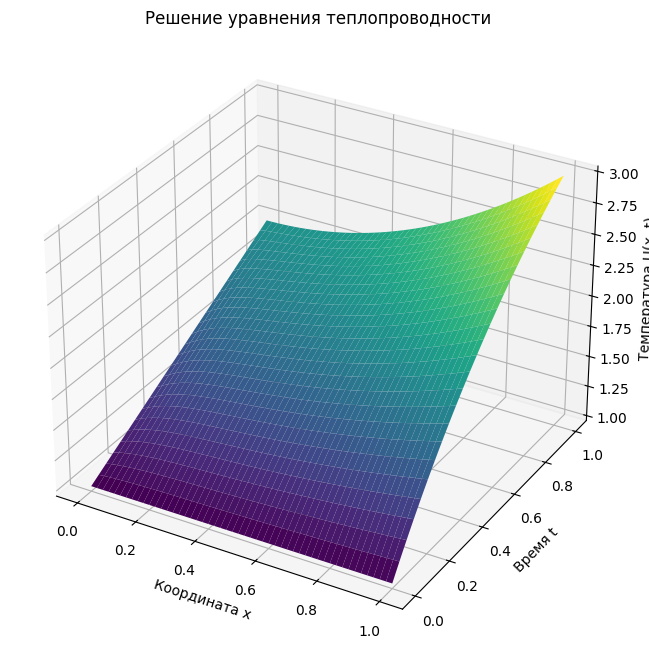

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]

[0.00000000e+00 2.00040008e-04 4.00080016e-04 ... 9.99599920e-01
 9.99799960e-01 1.00000000e+00]

[[1.         1.02       1.04       ... 1.96       1.98       2.        ]
 [1.         1.02015098 1.04019397 ... 1.96036278 1.98028782 2.00000004]
 [1.         1.02027135 1.04037172 ... 1.96069181 1.98051321 2.00000016]
 ...
 [1.         1.06130949 1.12141145 ... 2.94973086 2.97450921 2.99880036]
 [1.         1.06132078 1.12143383 ... 2.95011844 2.97490292 2.99920016]
 [1.         1.06133209 1.12145622 ... 2.95050609 2.97529671 2.99960004]]


In [ ]:
print(*implicit_scheme(Nx[1], Nt[1]), sep='\n\n')

###Для 101 узлов и условием на τ

<Не явная> H: 0.01,	Tau: 5e-05
Условие сходимости явной схемы выполняется


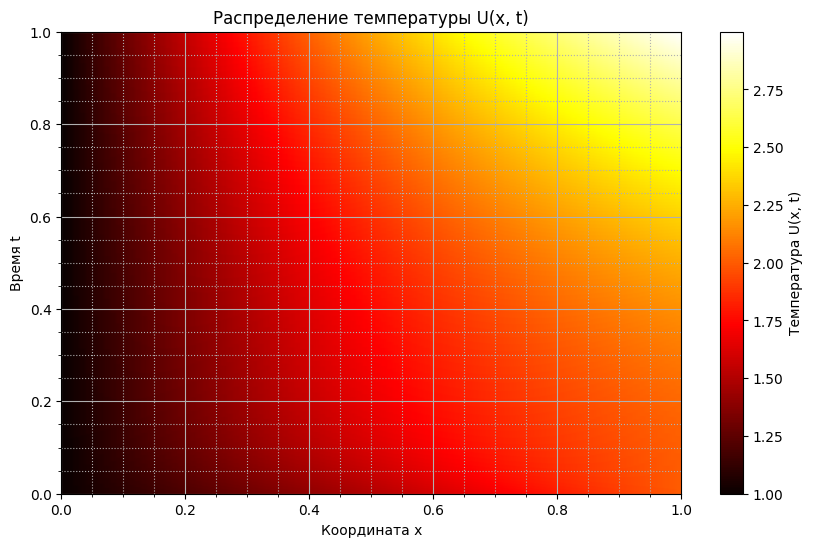

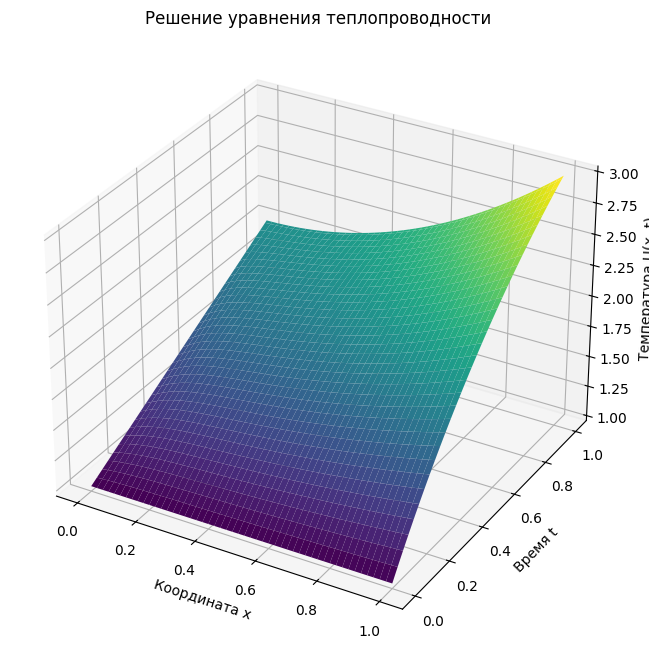

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]

[0.00000000e+00 5.00025001e-05 1.00005000e-04 ... 9.99899995e-01
 9.99949997e-01 1.00000000e+00]

[[1.         1.01       1.02       ... 1.98       1.99       2.        ]
 [1.         1.01003717 1.02004745 ... 1.98009175 1.99007258 2.        ]
 [1.         1.01006665 1.0200908  ... 1.98017514 1.99012961 2.00000001]
 ...
 [1.         1.0308199  1.06133396 ... 2.97539414 2.98760762 2.99970002]
 [1.         1.03082132 1.06133679 ... 2.9754926  2.98770684 2.99980001]
 [1.         1.03

In [ ]:
print(*implicit_scheme(Nx[2], Nt[2]), sep='\n\n')

##Сравнение схем

<Явная> H: 0.1,	Tau: 0.005
Условие сходимости явной схемы выполняется
<Не явная> H: 0.1,	Tau: 0.005
Условие сходимости явной схемы выполняется
<Явная> H: 0.02,	Tau: 0.0002
Условие сходимости явной схемы выполняется
<Не явная> H: 0.02,	Tau: 0.0002
Условие сходимости явной схемы выполняется
<Явная> H: 0.01,	Tau: 5e-05
Условие сходимости явной схемы выполняется
<Не явная> H: 0.01,	Tau: 5e-05
Условие сходимости явной схемы выполняется
<Явная> H: 0.01,	Tau: 5e-05
Условие сходимости явной схемы выполняется
<Не явная> H: 0.01,	Tau: 5e-05
Условие сходимости явной схемы выполняется


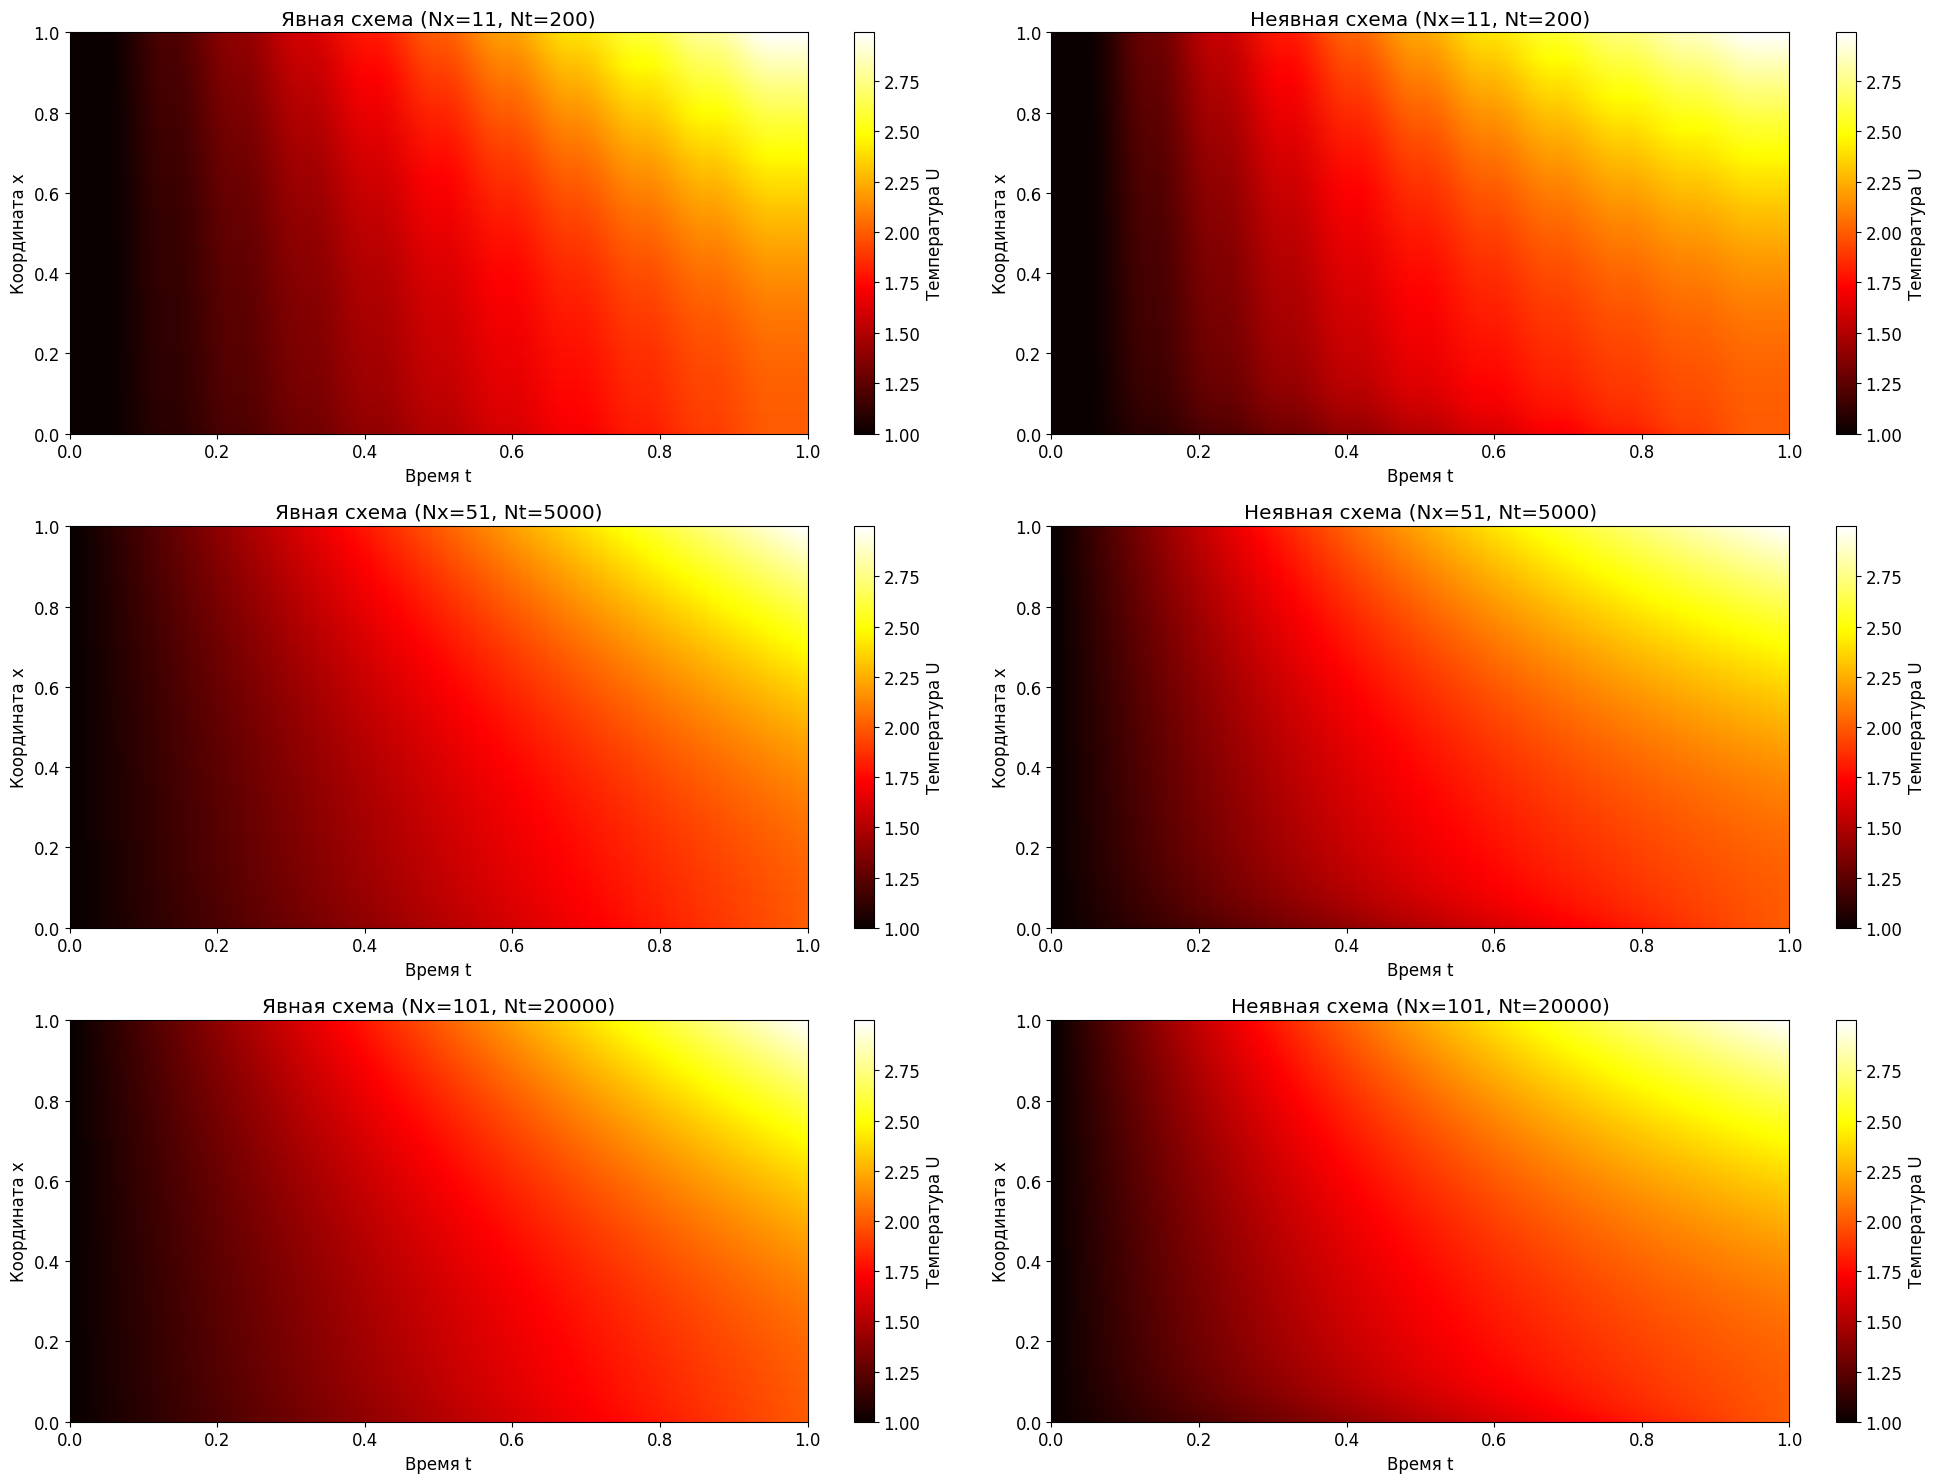

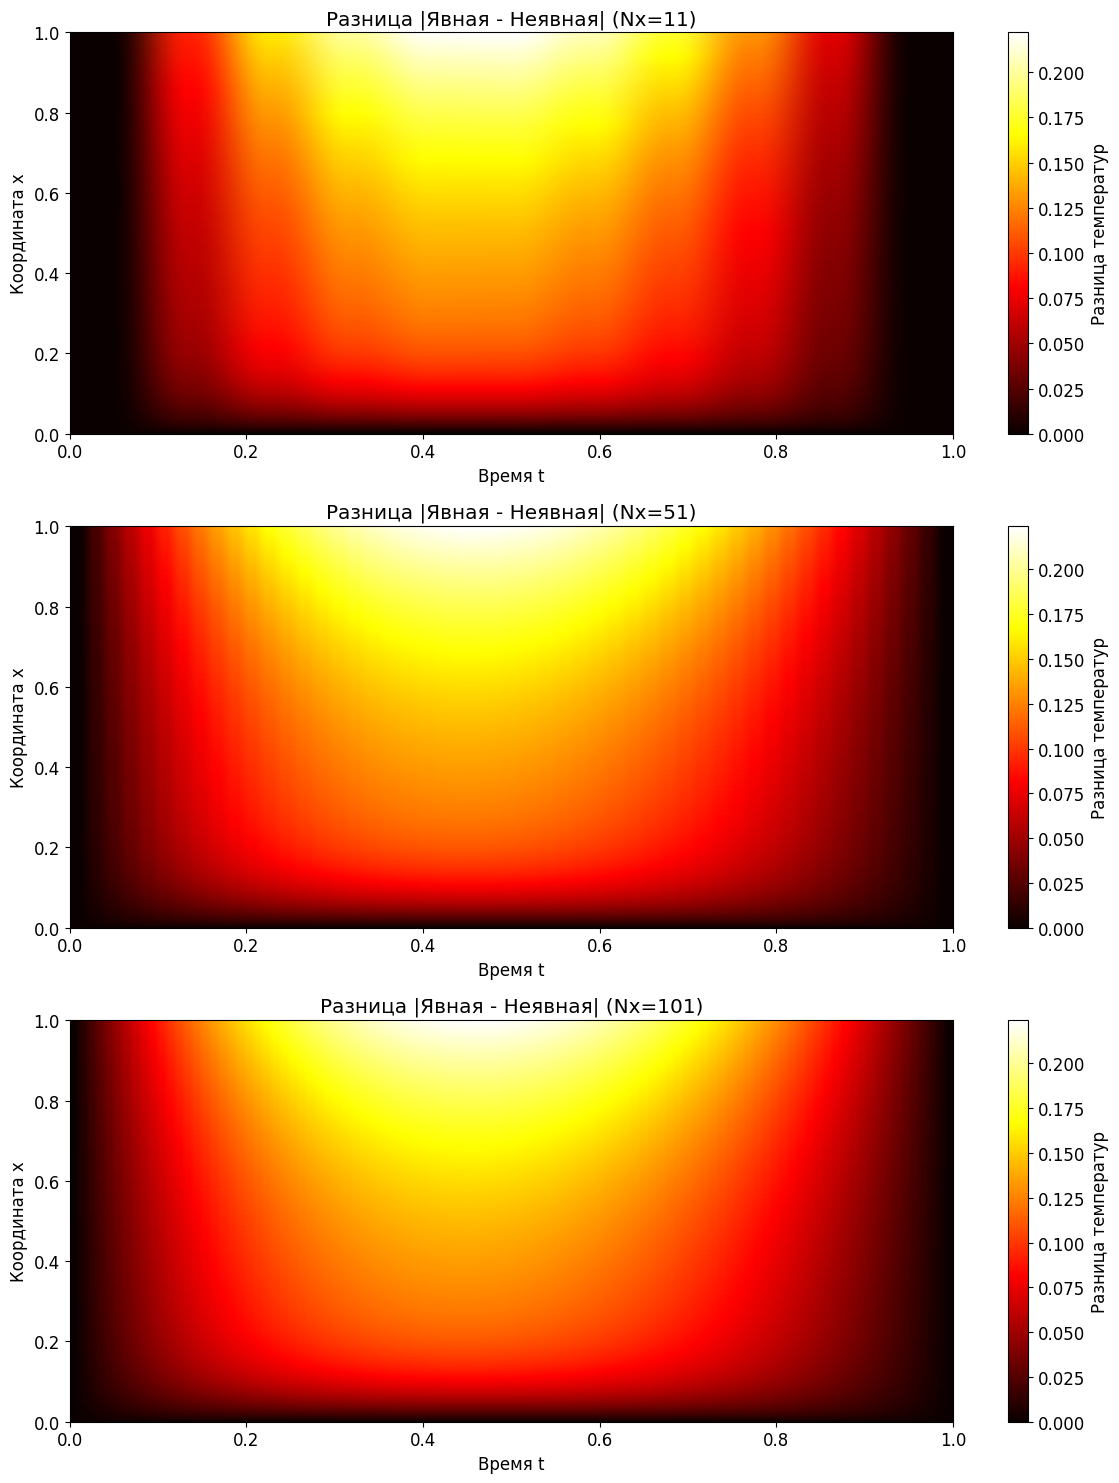

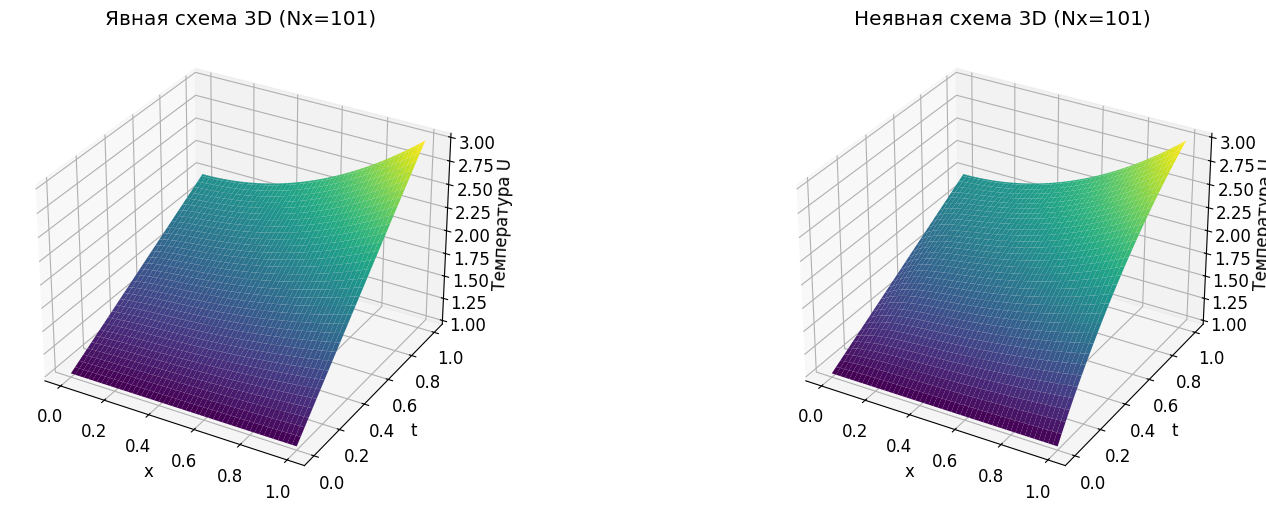

In [ ]:
Nx_values = [11, 51, 101]

# Настройка визуализации
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)

# Создание фигур для тепловых карт
fig_heatmaps, axs = plt.subplots(len(Nx_values), 2, figsize=(20, 15))
fig_diff, axs_diff = plt.subplots(len(Nx_values), 1, figsize=(12, 15))

for idx, Nx in enumerate(Nx_values):
    # Расчет параметров сетки
    dx = L / (Nx - 1)
    dt_max = dx ** 2 / (2 + dx)
    Nt = 2 * (Nx - 1) ** 2
    dt = T / Nt

    # Расчет решений
    x_exp, t_exp, U_exp = explicit_scheme(Nx, Nt, True)
    x_imp, t_imp, U_imp = implicit_scheme(Nx, Nt, True)

    # Тепловые карты решений
    im1 = axs[idx, 0].imshow(U_exp, aspect='auto',
                             extent=[0, L, 0, T],
                             origin='lower', cmap='hot')
    axs[idx, 0].set_title(f'Явная схема (Nx={Nx}, Nt={Nt})')
    axs[idx, 0].set_xlabel('Время t')
    axs[idx, 0].set_ylabel('Координата x')
    fig_heatmaps.colorbar(im1, ax=axs[idx, 0], label='Температура U')

    im2 = axs[idx, 1].imshow(U_imp, aspect='auto',
                             extent=[0, L, 0, T],
                             origin='lower', cmap='hot')
    axs[idx, 1].set_title(f'Неявная схема (Nx={Nx}, Nt={Nt})')
    axs[idx, 1].set_xlabel('Время t')
    axs[idx, 1].set_ylabel('Координата x')
    fig_heatmaps.colorbar(im2, ax=axs[idx, 1], label='Температура U')

    # Тепловая карта разницы
    diff = np.abs(U_exp - U_imp)
    im_diff = axs_diff[idx].imshow(diff, aspect='auto',
                                   extent=[0, L, 0, T],
                                   origin='lower', cmap='hot')
    axs_diff[idx].set_title(f'Разница |Явная - Неявная| (Nx={Nx})')
    axs_diff[idx].set_xlabel('Время t')
    axs_diff[idx].set_ylabel('Координата x')
    fig_diff.colorbar(im_diff, ax=axs_diff[idx], label='Разница температур')

fig_heatmaps.tight_layout()
fig_diff.tight_layout()

# 3D визуализация для Nx=101
Nx = Nx_values[-1]
dx = L / (Nx - 1)
dt_max = dx ** 2 / (2 + dx)
Nt = 2 * (Nx - 1) ** 2

x, t, U_exp = explicit_scheme(Nx, Nt, True)
X, T_mesh = np.meshgrid(t, x)

fig3d = plt.figure(figsize=(18, 6))
ax1 = fig3d.add_subplot(121, projection='3d')
ax1.plot_surface(X, T_mesh, U_exp.T, cmap='viridis')
ax1.set_title(f'Явная схема 3D (Nx={Nx})')
ax1.set_zlabel('Температура U')

x, t, U_imp = implicit_scheme(Nx, Nt, True)
X, T_mesh = np.meshgrid(t, x)

ax2 = fig3d.add_subplot(122, projection='3d')
ax2.plot_surface(X, T_mesh, U_imp.T, cmap='viridis')
ax2.set_title(f'Неявная схема 3D (Nx={Nx})')
ax2.set_zlabel('Температура U')

for ax in [ax1, ax2]:
    ax.set_xlabel('x')
    ax.set_ylabel('t')

plt.show()

#Вариант 1

---


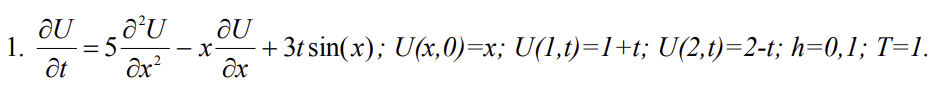

##Явная схема

In [ ]:
# Параметры задачи
L = 1.0  # Длина стержня
T = 1.0  # Общее время
alpha = 5.0  # Коэффициент перед второй производной

# Параметры сетки
Nx = np.array([11, 51, 101])  # Количество узлов по пространству
Nt = (Nx - 1) ** 2 * 2 * int(alpha)  # Количество шагов по времени (т.к 1/nx[i] = h, а tau = h**2/2*alpha)


# Функция расчета явной схемы
def explicit_scheme(Nx, Nt, silent=False):
    h = L / (Nx - 1)
    tau = T / Nt
    x = np.linspace(1, L + 1, Nx)  # Узлы сетки по X
    t = np.linspace(0, T, Nt)
    print(
        f"<Явная> H: {h},\tTau: {tau}\nУсловие сходимости явной схемы {'выполняется' if h ** 2 / (2 * alpha) >= tau else 'не выполняется!'}")
    U = np.zeros((Nt, Nx))  # Массив значений температуры во времени и пространстве (i - время, j - иксы)
    # Начальное условие в момент времени t = 0
    U[0, :] = x
    # Краевые условия для t = 0
    U[0, 0] = 1
    U[0, -1] = 2
    # Проходим по всем слоям (моментам времени)
    for k in range(Nt - 1):
        # Записываем краевые условия в текущий момент времени
        for i in range(1, Nx - 1):
            d2U = (U[k, i + 1] - 2 * U[k, i] + U[k, i - 1]) / h ** 2
            dU = (U[k, i + 1] - U[k, i - 1]) / (2 * h)
            source = 3 * k * tau * np.sin(x[i])
            U[k + 1, i] = U[k, i] + tau * (alpha * d2U - x[i] * dU + source)
        U[k + 1, 0] = 1 + tau * k + tau
        U[k + 1, -1] = 2 - (k * tau + tau)
    if not silent:
        plt.figure(figsize=(10, 6))
        plt.imshow(U, aspect='auto', extent=[0, L, 0, T], origin='lower', cmap='hot')
        plt.colorbar(label='Температура U(x, t)')
        plt.ylabel('Время t')
        plt.xlabel('Координата x')
        plt.title('Распределение температуры U(x, t)')
        plt.minorticks_on()
        plt.grid(which='major')
        plt.grid(which='minor', linestyle=':')
        plt.show()

        X, T_mesh = np.meshgrid(t, x)
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, T_mesh, U.T, cmap='viridis')
        ax.set_xlabel('Координата x')
        ax.set_ylabel('Время t')
        ax.set_zlabel('Температура U(x, t)')
        ax.set_title('Решение уравнения теплопроводности')
        plt.show()
    return x, t, U

###Для 11 узлов

<Явная> H: 0.1,	Tau: 0.001
Условие сходимости явной схемы выполняется


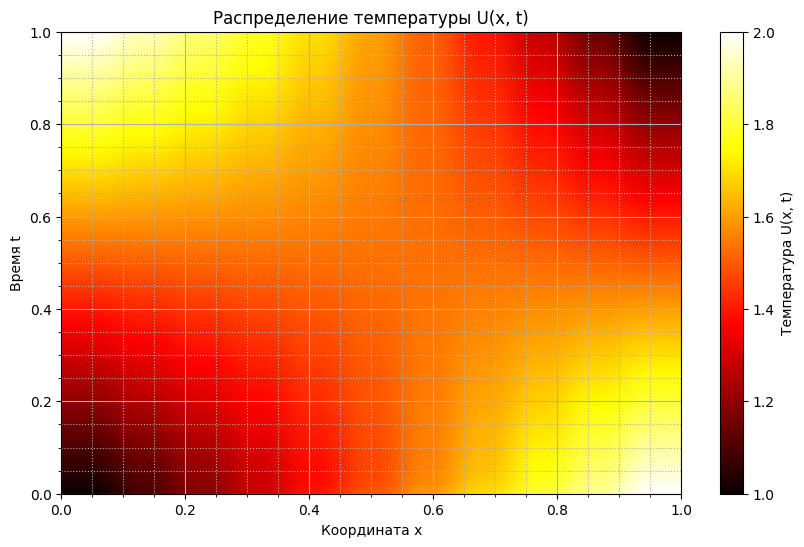

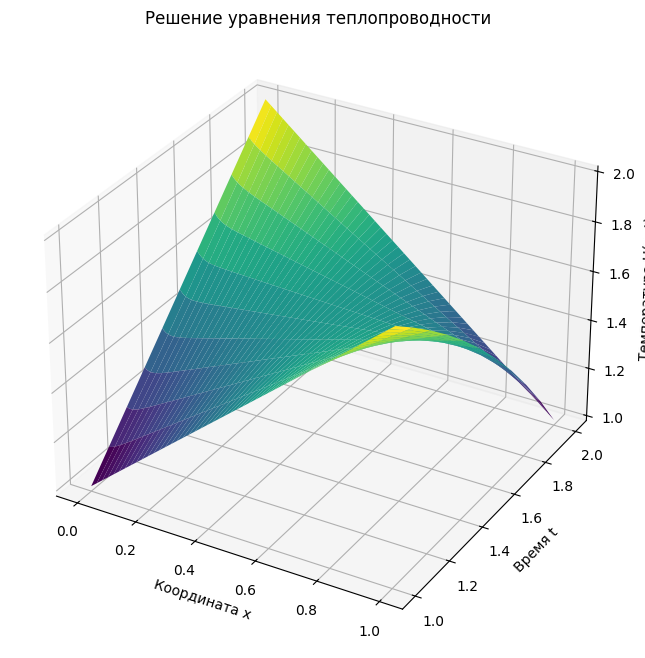

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]

[0.         0.001001   0.002002   0.003003   0.004004   0.00500501
 0.00600601 0.00700701 0.00800801 0.00900901 0.01001001 0.01101101
 0.01201201 0.01301301 0.01401401 0.01501502 0.01601602 0.01701702
 0.01801802 0.01901902 0.02002002 0.02102102 0.02202202 0.02302302
 0.02402402 0.02502503 0.02602603 0.02702703 0.02802803 0.02902903
 0.03003003 0.03103103 0.03203203 0.03303303 0.03403403 0.03503504
 0.03603604 0.03703704 0.03803804 0.03903904 0.04004004 0.04104104
 0.04204204 0.04304304 0.04404404 0.04504505 0.04604605 0.04704705
 0.04804805 0.04904905 0.05005005 0.05105105 0.05205205 0.05305305
 0.05405405 0.05505506 0.05605606 0.05705706 0.05805806 0.05905906
 0.06006006 0.06106106 0.06206206 0.06306306 0.06406406 0.06506507
 0.06606607 0.06706707 0.06806807 0.06906907 0.07007007 0.07107107
 0.07207207 0.07307307 0.07407407 0.07507508 0.07607608 0.07707708
 0.07807808 0.07907908 0.08008008 0.08108108 0.08208208 0.08308308
 0.08408408 0.0

In [ ]:
print(*explicit_scheme(Nx[0], Nt[0]), sep='\n\n')

###Для 51 узла

<Явная> H: 0.02,	Tau: 4e-05
Условие сходимости явной схемы выполняется


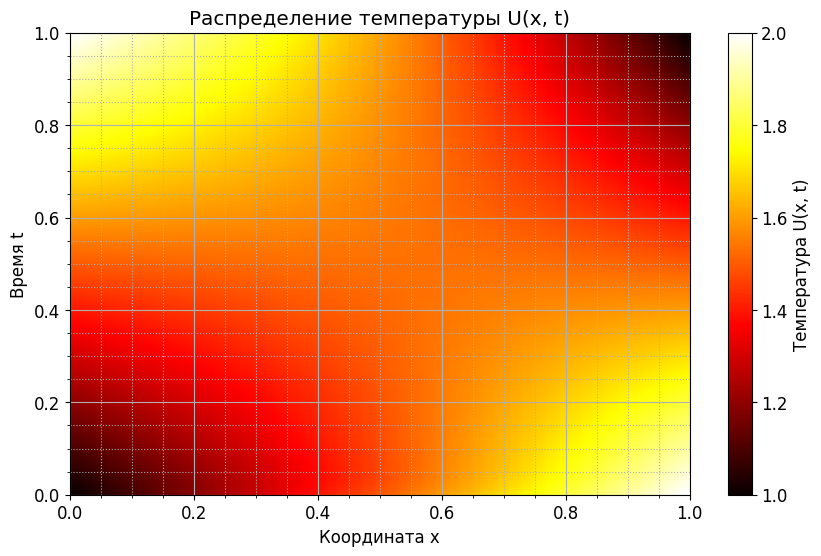

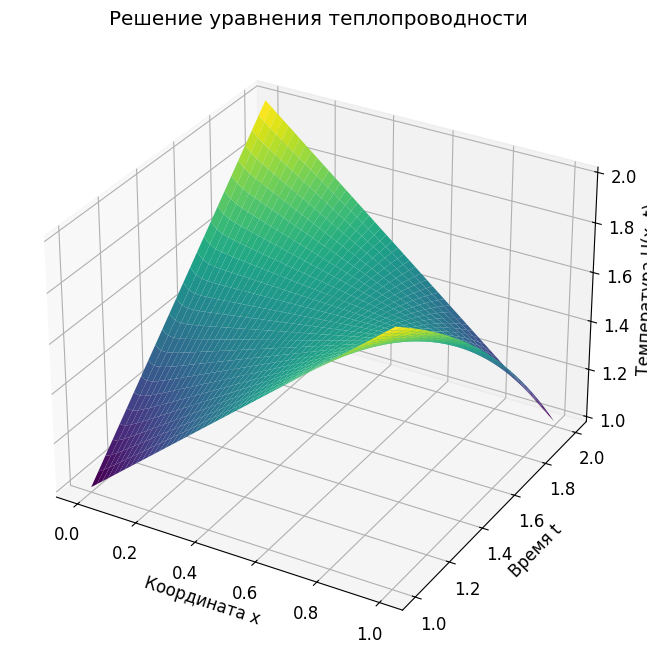

[1.   1.02 1.04 1.06 1.08 1.1  1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26
 1.28 1.3  1.32 1.34 1.36 1.38 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54
 1.56 1.58 1.6  1.62 1.64 1.66 1.68 1.7  1.72 1.74 1.76 1.78 1.8  1.82
 1.84 1.86 1.88 1.9  1.92 1.94 1.96 1.98 2.  ]

[0.00000000e+00 4.00016001e-05 8.00032001e-05 ... 9.99919997e-01
 9.99959998e-01 1.00000000e+00]

[[1.         1.02       1.04       ... 1.96       1.98       2.        ]
 [1.00004    1.0199592  1.0399584  ... 1.9599216  1.9799208  1.99996   ]
 [1.00008    1.01995849 1.03991681 ... 1.95984321 1.97986153 1.99992   ]
 ...
 [1.99988    1.9869735  1.97388713 ... 1.05942113 1.03003594 1.00012   ]
 [1.99992    1.98701232 1.97392475 ... 1.05938534 1.02999806 1.00008   ]
 [1.99996    1.98705113 1.97396237 ... 1.05934955 1.02996018 1.00004   ]]


In [ ]:
print(*explicit_scheme(Nx[1], Nt[1]), sep='\n\n')

###Для 101 узла

<Явная> H: 0.01,	Tau: 1e-05
Условие сходимости явной схемы выполняется


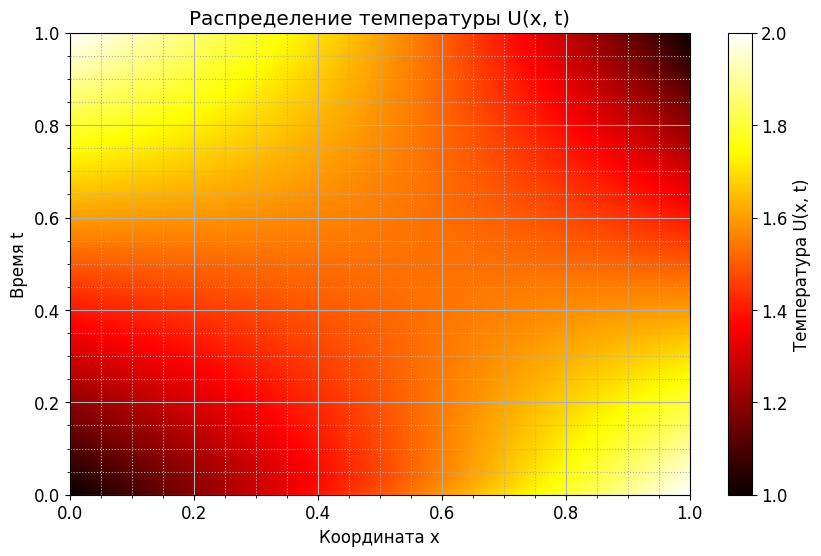

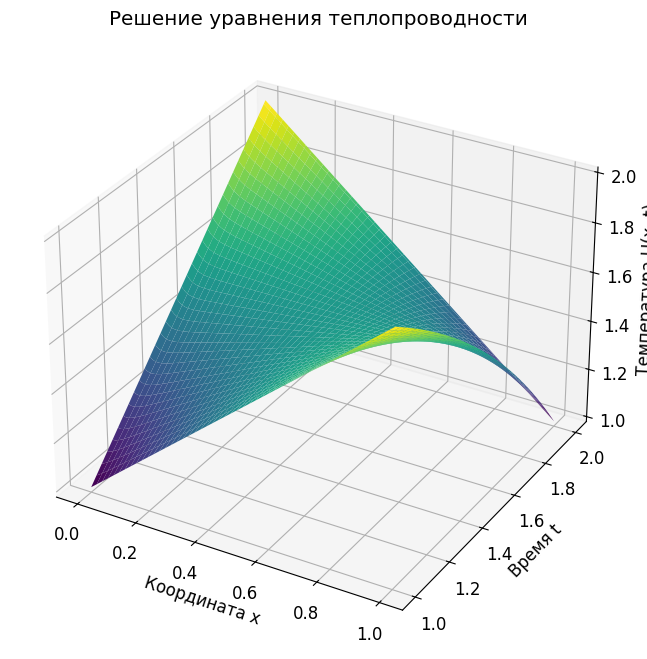

[1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11 1.12 1.13
 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25 1.26 1.27
 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41
 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53 1.54 1.55
 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69
 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81 1.82 1.83
 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95 1.96 1.97
 1.98 1.99 2.  ]

[0.00000e+00 1.00001e-05 2.00002e-05 ... 9.99980e-01 9.99990e-01
 1.00000e+00]

[[1.         1.01       1.02       ... 1.98       1.99       2.        ]
 [1.00001    1.0099899  1.0199898  ... 1.9799802  1.9899801  1.99999   ]
 [1.00002    1.00998981 1.0199796  ... 1.9799604  1.98996519 1.99998   ]
 ...
 [1.99997    1.99353746 1.98706077 ... 1.02995065 1.01505723 1.00003   ]
 [1.99998    1.99354731 1.98707047 ... 1.02994118 1.0150475  1.00002   ]
 [1.99999    1.99355716 1.98708018 

In [ ]:
print(*explicit_scheme(Nx[2], Nt[2]), sep='\n\n')

##Неявная схема


In [ ]:
def implicit_scheme(Nx, Nt, silent=False):
    # 1. Инициализация сетки
    dx = L / (Nx - 1)  # Шаг по пространству
    dt = T / Nt  # Шаг по времени
    print(
        f"<Не явная> H: {dx},\tTau: {dt}\nУсловие сходимости явной схемы {'выполняется' if dx ** 2 / (2 * alpha) >= dt else 'не выполняется!'}")
    x = np.linspace(1, L + 1, Nx)  # Пространственные узлы
    t = np.linspace(0, T, Nt)  # Временные узлы
    U = np.zeros((Nt, Nx))  # Инициализация массива решения

    # 2. Начальное условие U(x,0) = x
    U[0, :] = x

    # 3. Коэффициенты трехдиагональной матрицы
    a_coeff = (-alpha * dt / dx ** 2) + (dt / (2 * dx))  # Коэффициент для U_{i-1}
    b_coeff = 1 + 2 * alpha * dt / dx ** 2  # Коэффициент для U_i
    c_coeff = (-alpha * dt / dx ** 2) - (dt / (2 * dx))  # Коэффициент для U_{i+1}

    # 4. Временной цикл
    for n in range(Nt - 1):
        current_time = n * dt
        next_time = (n + 1) * dt

        # 4.1 Граничные условия
        U[n + 1, 0] = 1 + next_time
        U[n + 1, -1] = 2 - next_time

        # 4.2 Формирование правой части
        rhs = U[n, 1:-1].copy()  # Копируем предыдущее решение

        # Добавляем источник 3t*sin(x)
        rhs += dt * 3 * next_time * np.sin(x[1:-1])

        # Учет граничных условий в правой части
        rhs[0] -= a_coeff * U[n + 1, 0]  # Влияние левой границы
        rhs[-1] -= c_coeff * U[n + 1, -1]  # Влияние правой границы

        # 4.3 Решение системы уравнений
        solution = thomas(
            a=np.full(Nx - 2, a_coeff),  # Нижняя диагональ (Nx-2 элемента)
            b=np.full(Nx - 2, b_coeff),  # Главная диагональ
            c=np.full(Nx - 2, c_coeff),  # Верхняя диагональ
            d=rhs
        )

        # 4.4 Обновление решения
        U[n + 1, 1:-1] = solution
    if not silent:
        plt.figure(figsize=(10, 6))
        plt.imshow(U, aspect='auto', extent=[0, L, 0, T], origin='lower', cmap='hot')
        plt.colorbar(label='Температура U(x, t)')
        plt.ylabel('Время t')
        plt.xlabel('Координата x')
        plt.title('Распределение температуры U(x, t)')
        plt.minorticks_on()
        plt.grid(which='major')
        plt.grid(which='minor', linestyle=':')
        plt.show()

        X, T_mesh = np.meshgrid(t, x)
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, T_mesh, U.T, cmap='viridis')
        ax.set_xlabel('Координата x')
        ax.set_ylabel('Время t')
        ax.set_zlabel('Температура U(x, t)')
        ax.set_title('Решение уравнения теплопроводности')
        plt.show()
    return x, t, U

###Для 11 узлов и условием на τ

<Не явная> H: 0.1,	Tau: 0.001
Условие сходимости явной схемы выполняется


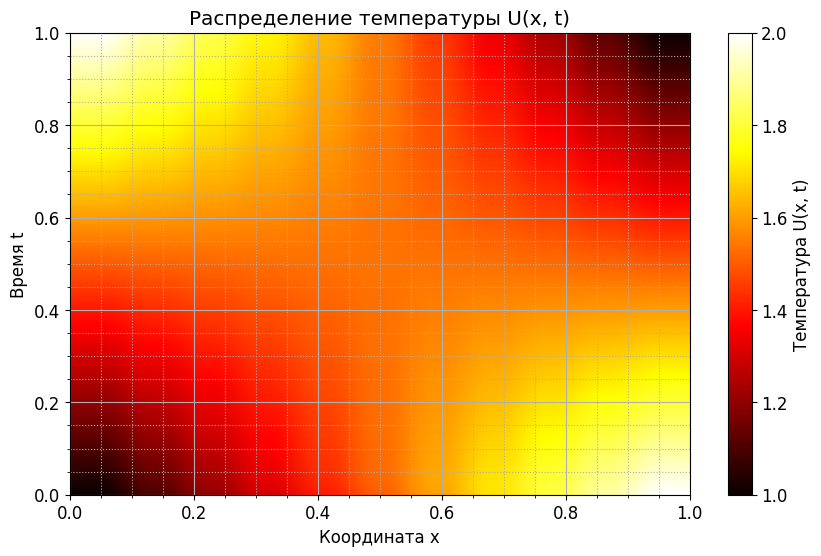

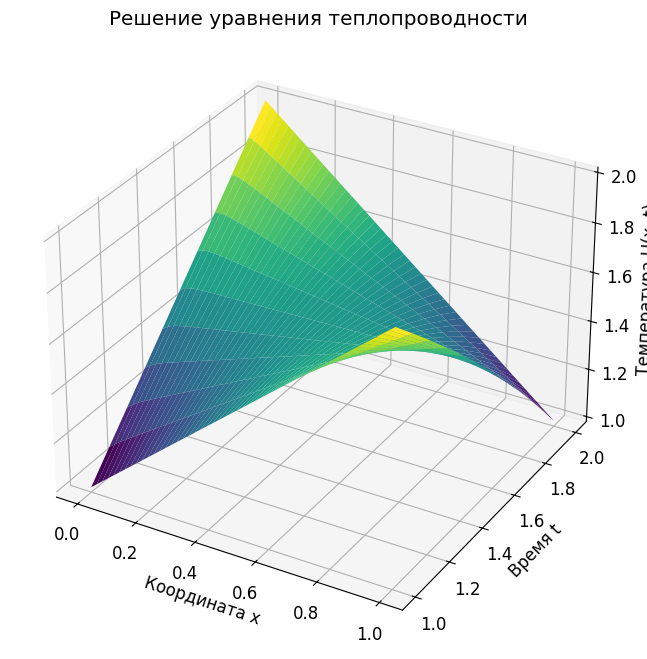

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]

[0.         0.001001   0.002002   0.003003   0.004004   0.00500501
 0.00600601 0.00700701 0.00800801 0.00900901 0.01001001 0.01101101
 0.01201201 0.01301301 0.01401401 0.01501502 0.01601602 0.01701702
 0.01801802 0.01901902 0.02002002 0.02102102 0.02202202 0.02302302
 0.02402402 0.02502503 0.02602603 0.02702703 0.02802803 0.02902903
 0.03003003 0.03103103 0.03203203 0.03303303 0.03403403 0.03503504
 0.03603604 0.03703704 0.03803804 0.03903904 0.04004004 0.04104104
 0.04204204 0.04304304 0.04404404 0.04504505 0.04604605 0.04704705
 0.04804805 0.04904905 0.05005005 0.05105105 0.05205205 0.05305305
 0.05405405 0.05505506 0.05605606 0.05705706 0.05805806 0.05905906
 0.06006006 0.06106106 0.06206206 0.06306306 0.06406406 0.06506507
 0.06606607 0.06706707 0.06806807 0.06906907 0.07007007 0.07107107
 0.07207207 0.07307307 0.07407407 0.07507508 0.07607608 0.07707708
 0.07807808 0.07907908 0.08008008 0.08108108 0.08208208 0.08308308
 0.08408408 0.0

In [ ]:
print(*implicit_scheme(Nx[0], Nt[0]), sep='\n\n')

###Для 51 узлов и условием на τ

<Не явная> H: 0.02,	Tau: 4e-05
Условие сходимости явной схемы выполняется


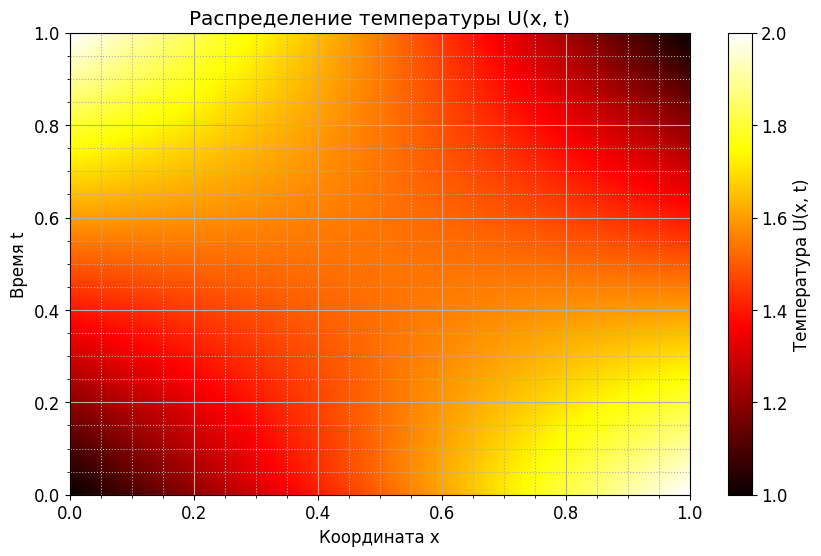

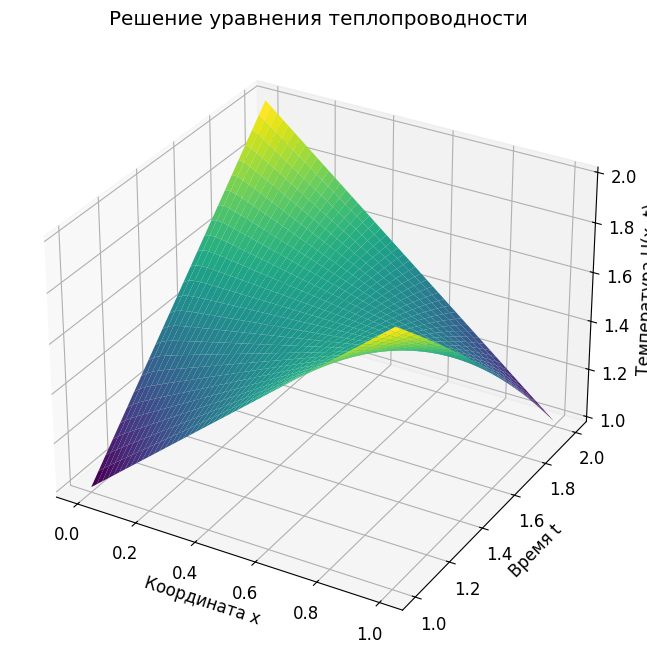

[1.   1.02 1.04 1.06 1.08 1.1  1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26
 1.28 1.3  1.32 1.34 1.36 1.38 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54
 1.56 1.58 1.6  1.62 1.64 1.66 1.68 1.7  1.72 1.74 1.76 1.78 1.8  1.82
 1.84 1.86 1.88 1.9  1.92 1.94 1.96 1.98 2.  ]

[0.00000000e+00 4.00016001e-05 8.00032001e-05 ... 9.99919997e-01
 9.99959998e-01 1.00000000e+00]

[[1.         1.02       1.04       ... 1.96       1.98       2.        ]
 [1.00004    1.02004    1.04004    ... 1.96003424 1.98001852 1.99996   ]
 [1.00008    1.02008001 1.04008001 ... 1.96006182 1.98002465 1.99992   ]
 ...
 [1.99988    1.98295618 1.96597263 ... 1.04834243 1.0243314  1.00012   ]
 [1.99992    1.98299465 1.96600957 ... 1.04830576 1.02429307 1.00008   ]
 [1.99996    1.98303312 1.9660465  ... 1.0482691  1.02425474 1.00004   ]]


In [ ]:
print(*implicit_scheme(Nx[1], Nt[1]), sep='\n\n')

###Для 101 узлов и условием на τ

<Не явная> H: 0.01,	Tau: 1e-05
Условие сходимости явной схемы выполняется


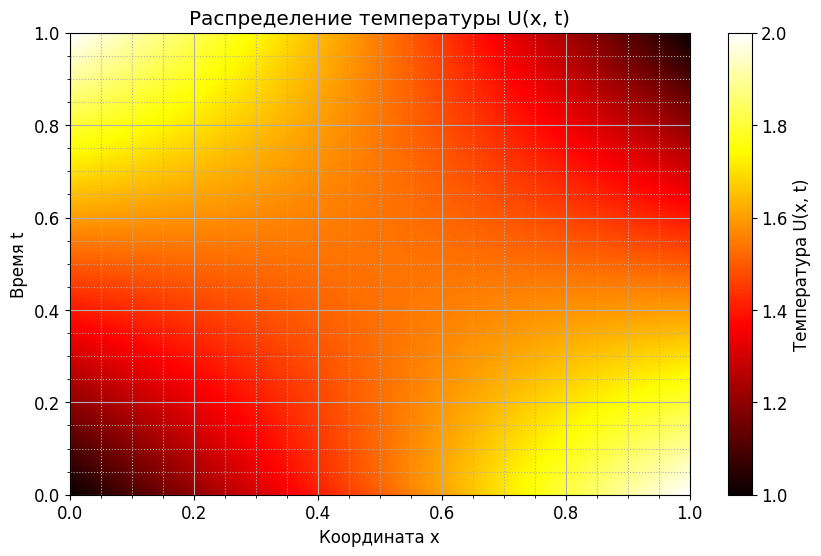

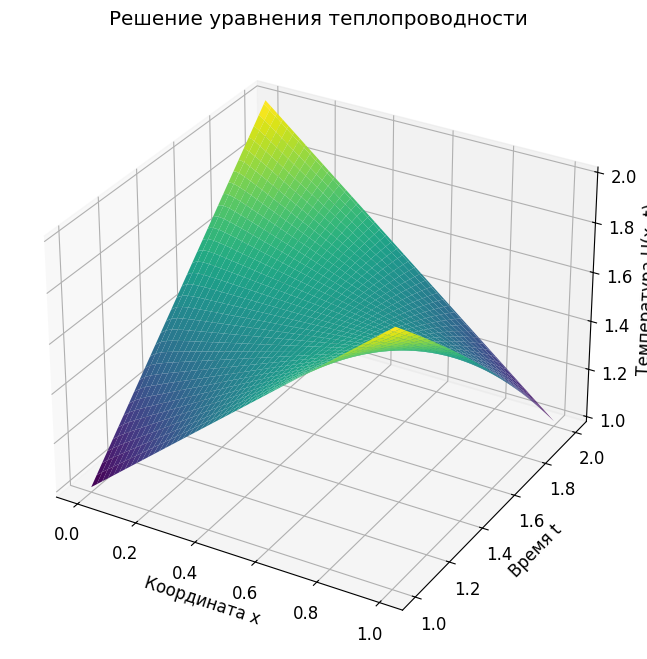

[1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11 1.12 1.13
 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25 1.26 1.27
 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41
 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53 1.54 1.55
 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69
 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81 1.82 1.83
 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95 1.96 1.97
 1.98 1.99 2.  ]

[0.00000e+00 1.00001e-05 2.00002e-05 ... 9.99980e-01 9.99990e-01
 1.00000e+00]

[[1.         1.01       1.02       ... 1.98       1.99       2.        ]
 [1.00001    1.01001    1.02001    ... 1.98000856 1.99000464 1.99999   ]
 [1.00002    1.01002    1.02002    ... 1.98001546 1.99000617 1.99998   ]
 ...
 [1.99997    1.99151344 1.98304263 ... 1.02424504 1.01216261 1.00003   ]
 [1.99998    1.99152325 1.98305224 ... 1.02423546 1.01215282 1.00002   ]
 [1.99999    1.99153306 1.98306186 

In [ ]:
print(*implicit_scheme(Nx[2], Nt[2]), sep='\n\n')

##Сравнение схем

<Явная> H: 0.1,	Tau: 0.001
Условие сходимости явной схемы выполняется
<Не явная> H: 0.1,	Tau: 0.001
Условие сходимости явной схемы выполняется
<Явная> H: 0.02,	Tau: 4e-05
Условие сходимости явной схемы выполняется
<Не явная> H: 0.02,	Tau: 4e-05
Условие сходимости явной схемы выполняется
<Явная> H: 0.01,	Tau: 1e-05
Условие сходимости явной схемы выполняется
<Не явная> H: 0.01,	Tau: 1e-05
Условие сходимости явной схемы выполняется
<Явная> H: 0.01,	Tau: 1e-05
Условие сходимости явной схемы выполняется
<Не явная> H: 0.01,	Tau: 1e-05
Условие сходимости явной схемы выполняется


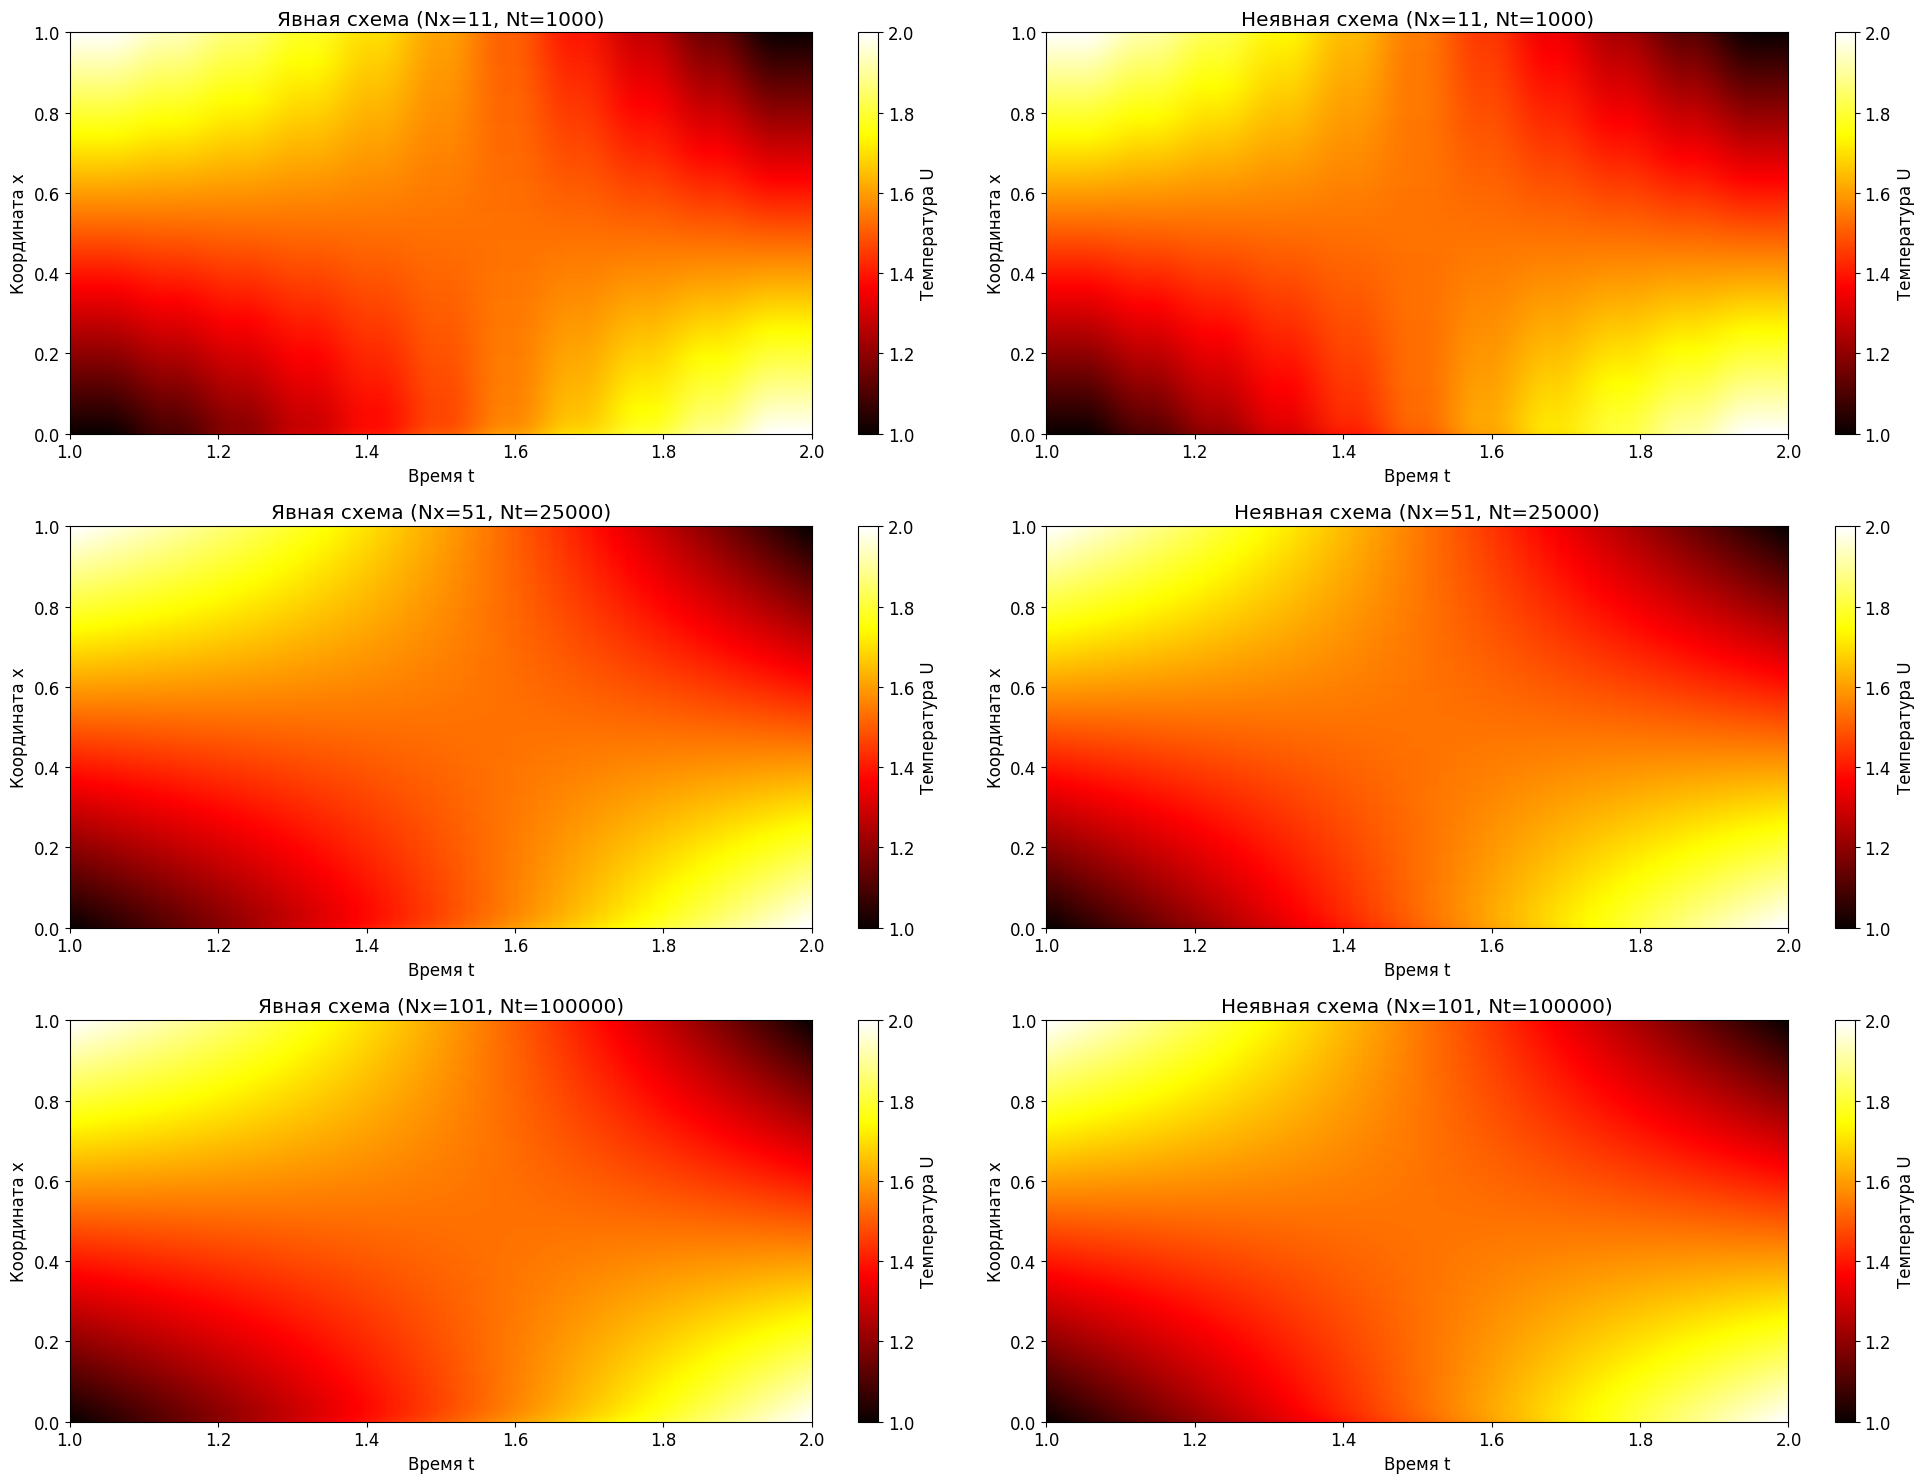

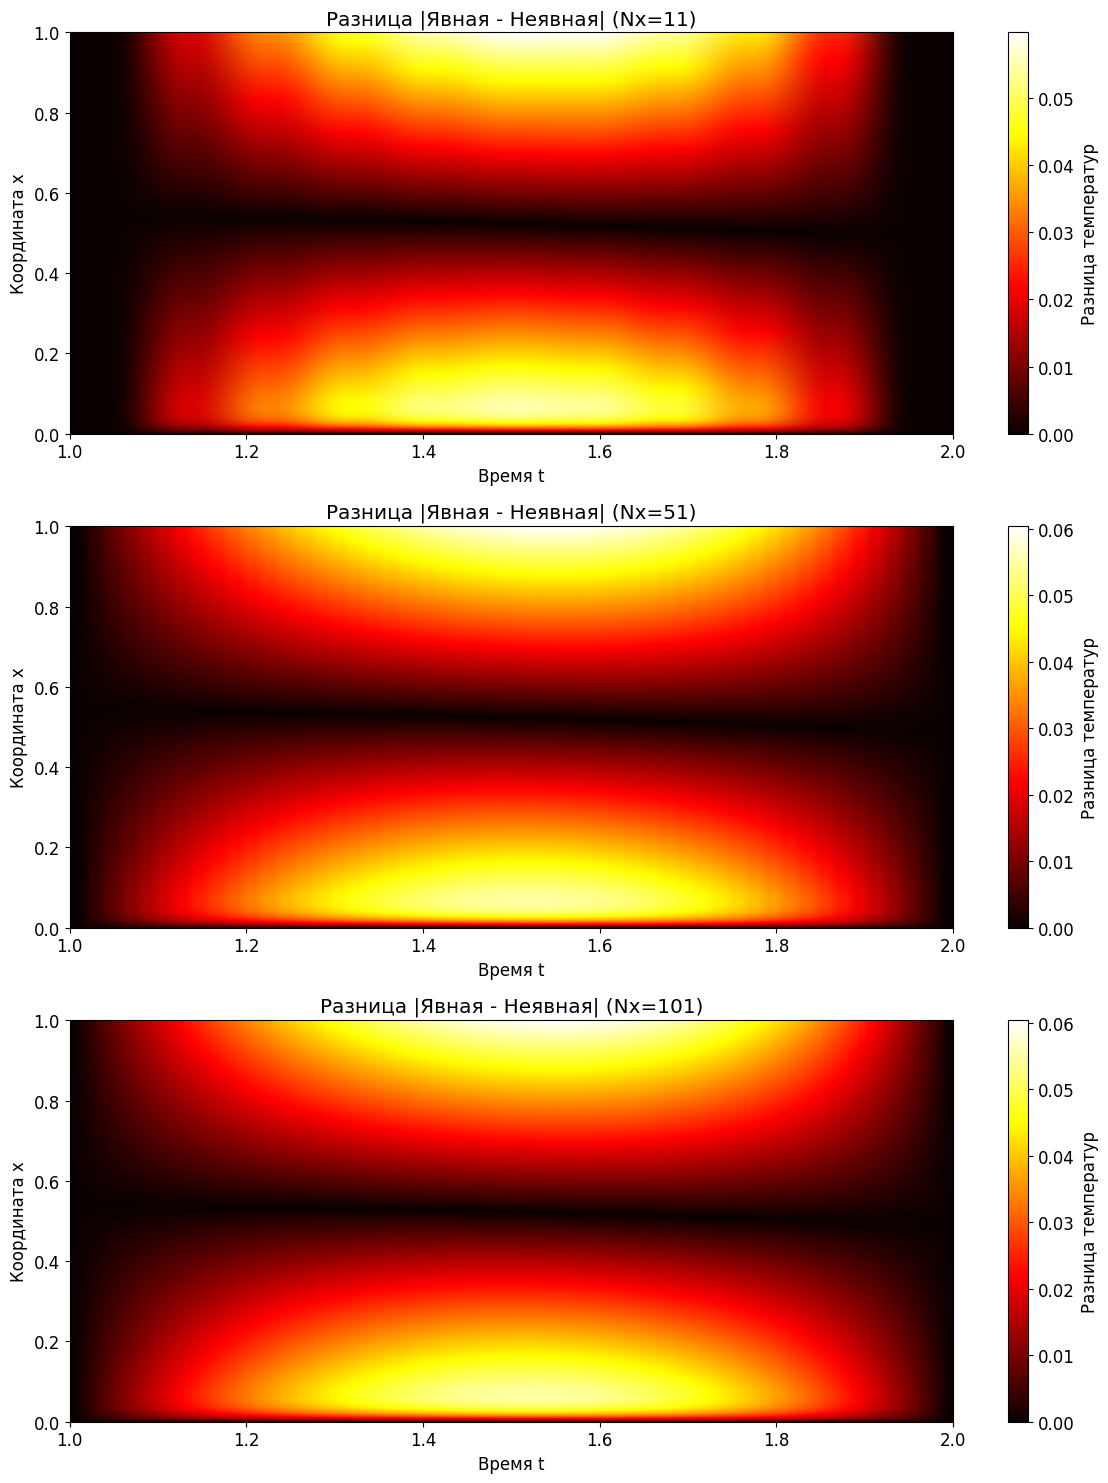

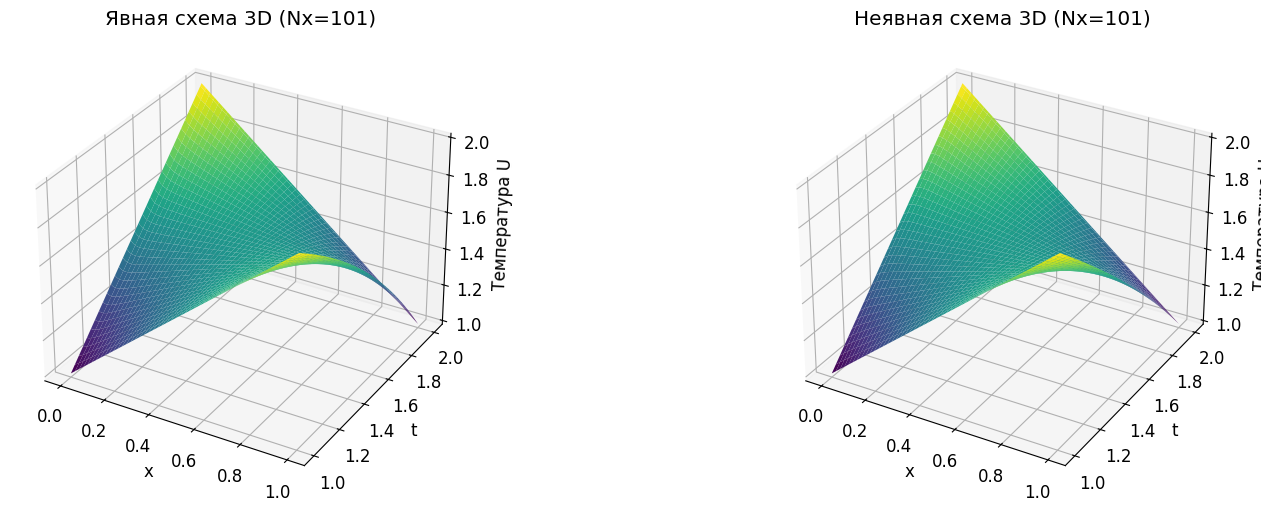

In [ ]:
Nx_values = [11, 51, 101]

# Настройка визуализации
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (15, 10)

# Создание фигур для тепловых карт
fig_heatmaps, axs = plt.subplots(len(Nx_values), 2, figsize=(20, 15))
fig_diff, axs_diff = plt.subplots(len(Nx_values), 1, figsize=(12, 15))

for idx, Nx in enumerate(Nx_values):
    # Расчет параметров сетки
    dx = L / (Nx - 1)
    dt_max = dx ** 2 / (2 + dx)
    Nt = int(alpha) * 2 * (Nx - 1) ** 2
    dt = T / Nt

    # Расчет решений
    x_exp, t_exp, U_exp = explicit_scheme(Nx, Nt, True)
    x_imp, t_imp, U_imp = implicit_scheme(Nx, Nt, True)

    # Тепловые карты решений
    im1 = axs[idx, 0].imshow(U_exp, aspect='auto',
                             extent=[1, L + 1, 0, T],
                             origin='lower', cmap='hot')
    axs[idx, 0].set_title(f'Явная схема (Nx={Nx}, Nt={Nt})')
    axs[idx, 0].set_xlabel('Время t')
    axs[idx, 0].set_ylabel('Координата x')
    fig_heatmaps.colorbar(im1, ax=axs[idx, 0], label='Температура U')

    im2 = axs[idx, 1].imshow(U_imp, aspect='auto',
                             extent=[1, L + 1, 0, T],
                             origin='lower', cmap='hot')
    axs[idx, 1].set_title(f'Неявная схема (Nx={Nx}, Nt={Nt})')
    axs[idx, 1].set_xlabel('Время t')
    axs[idx, 1].set_ylabel('Координата x')
    fig_heatmaps.colorbar(im2, ax=axs[idx, 1], label='Температура U')

    # Тепловая карта разницы
    diff = np.abs(U_exp - U_imp)
    im_diff = axs_diff[idx].imshow(diff, aspect='auto',
                                   extent=[1, L + 1, 0, T],
                                   origin='lower', cmap='hot')
    axs_diff[idx].set_title(f'Разница |Явная - Неявная| (Nx={Nx})')
    axs_diff[idx].set_xlabel('Время t')
    axs_diff[idx].set_ylabel('Координата x')
    fig_diff.colorbar(im_diff, ax=axs_diff[idx], label='Разница температур')

fig_heatmaps.tight_layout()
fig_diff.tight_layout()

# 3D визуализация для Nx=101
Nx = Nx_values[-1]
dx = L / (Nx - 1)
dt_max = dx ** 2 / (2 + dx)
Nt = int(alpha) * 2 * (Nx - 1) ** 2

x, t, U_exp = explicit_scheme(Nx, Nt, True)
X, T_mesh = np.meshgrid(t, x)

fig3d = plt.figure(figsize=(18, 6))
ax1 = fig3d.add_subplot(121, projection='3d')
ax1.plot_surface(X, T_mesh, U_exp.T, cmap='viridis')
ax1.set_title(f'Явная схема 3D (Nx={Nx})')
ax1.set_zlabel('Температура U')

x, t, U_imp = implicit_scheme(Nx, Nt, True)
X, T_mesh = np.meshgrid(t, x)

ax2 = fig3d.add_subplot(122, projection='3d')
ax2.plot_surface(X, T_mesh, U_imp.T, cmap='viridis')
ax2.set_title(f'Неявная схема 3D (Nx={Nx})')
ax2.set_zlabel('Температура U')

for ax in [ax1, ax2]:
    ax.set_xlabel('x')
    ax.set_ylabel('t')

plt.show()